## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

In [101]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #class(LinearRegression) inside module(linear_model) inside library(sklearn)
from sklearn import metrics

In [102]:
# Set up the data
data = "../data/"
train = "datasets/train.csv"
test = "datasets/test.csv"

In [103]:
#Read in the data
train_df = pd.read_csv(data+train)
test_df = pd.read_csv(data+test)

In [104]:
#train_df.loc[train_df['SalePrice'].isin(range(100))]
train_df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [105]:
# Select only integer data types for simplicity
integer_feature = list(train_df.select_dtypes(include=['int64']).columns)
integer_feature.remove('Id')
integer_feature.remove('PID')
integer_feature
integer_df = train_df[integer_feature]
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [106]:
train_df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [107]:
# Select only object data types for investigation
cat_feature = list(train_df.select_dtypes(include=['object']).columns)
cat_df = train_df[cat_feature]

In [108]:
# Filter out categorical features with null values
null_features = []
nulless_features = []
for column in cat_df.columns:
    if (train_df[column].isnull().sum()==0) & (test_df[column].isnull().sum()==0):
        nulless_features.append(column)
        print(f'Train {column}:\t{train_df[column].isnull().sum()} null ',f'Test {column}:\t{test_df[column].isnull().sum()} null ' )

Train MS Zoning:	0 null  Test MS Zoning:	0 null 
Train Street:	0 null  Test Street:	0 null 
Train Lot Shape:	0 null  Test Lot Shape:	0 null 
Train Land Contour:	0 null  Test Land Contour:	0 null 
Train Utilities:	0 null  Test Utilities:	0 null 
Train Lot Config:	0 null  Test Lot Config:	0 null 
Train Land Slope:	0 null  Test Land Slope:	0 null 
Train Neighborhood:	0 null  Test Neighborhood:	0 null 
Train Condition 1:	0 null  Test Condition 1:	0 null 
Train Condition 2:	0 null  Test Condition 2:	0 null 
Train Bldg Type:	0 null  Test Bldg Type:	0 null 
Train House Style:	0 null  Test House Style:	0 null 
Train Roof Style:	0 null  Test Roof Style:	0 null 
Train Roof Matl:	0 null  Test Roof Matl:	0 null 
Train Exterior 1st:	0 null  Test Exterior 1st:	0 null 
Train Exterior 2nd:	0 null  Test Exterior 2nd:	0 null 
Train Exter Qual:	0 null  Test Exter Qual:	0 null 
Train Exter Cond:	0 null  Test Exter Cond:	0 null 
Train Foundation:	0 null  Test Foundation:	0 null 
Train Heating:	0 null  Test

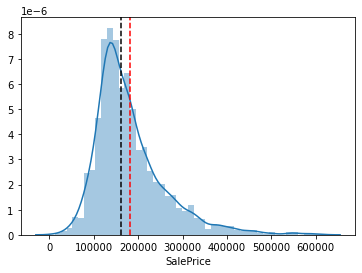

In [109]:
sns.distplot(train_df['SalePrice'], kde=True);
plt.axvline(train_df['SalePrice'].median(), color="k", linestyle="--");
plt.axvline(train_df['SalePrice'].mean(), color="r", linestyle="--");

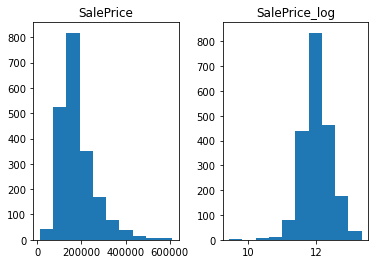

In [110]:
train_df['SalePrice_log'] = np.log(train_df.SalePrice)

train_df[['SalePrice','SalePrice_log']].hist(grid=False);

In [111]:
hoods

['Sawyer',
 'SawyerW',
 'NAmes',
 'Timber',
 'Edwards',
 'OldTown',
 'BrDale',
 'CollgCr',
 'Somerst',
 'Mitchel',
 'StoneBr',
 'NridgHt',
 'Gilbert',
 'Crawfor',
 'IDOTRR',
 'NWAmes',
 'Veenker',
 'MeadowV',
 'SWISU',
 'NoRidge',
 'ClearCr',
 'Blmngtn',
 'BrkSide',
 'NPkVill',
 'Blueste',
 'GrnHill',
 'Greens',
 'Landmrk']

In [112]:
hoods = list(train_df['Neighborhood'].unique())
# Aggregate driveways not paved
train_df['NeighborhoodC'] = train_df['Neighborhood'].map({'Sawyer' :1,
                                                         'SawyerW':0,
                                                         'NAmes'  :0,
                                                         'Timber' :0,
                                                         'Edwards':0,
                                                         'OldTown':0,
                                                         'BrDale' :1,
                                                         'CollgCr':0,
                                                         'Somerst':0,
                                                         'Mitchel':0,
                                                         'StoneBr':2,
                                                         'NridgHt':2,
                                                         'Gilbert':0,
                                                         'Crawfor':0,
                                                         'IDOTRR' :1,
                                                         'NWAmes' :0,
                                                         'Veenker':0,
                                                         'MeadowV':1,
                                                         'SWISU'  :1,
                                                         'NoRidge':2,
                                                         'ClearCr':0,
                                                         'Blmngtn':0,
                                                         'BrkSide':1,
                                                         'NPkVill':1,
                                                         'Blueste':1,
                                                         'GrnHill':0,
                                                         'Greens' :0,
                                                         'Landmrk':1})

In [113]:
train_df['NeighborhoodC']

0       1
1       0
2       0
3       0
4       0
       ..
2046    0
2047    0
2048    0
2049    0
2050    0
Name: NeighborhoodC, Length: 2051, dtype: int64

In [114]:
# Aggregate driveways not paved
train_df['Paved DriveC'] = train_df['Paved Drive'].map({'N':1, 'P':1, 'Y':0})
# Aggregate Lot shapes as the most Irregular(IR3), and other, more "regular", shapes
train_df['Lot ShapeC'] = train_df['Lot Shape'].map({'IR1':0, 'Reg':0, 'IR2':0, 'IR3':1})
# Separate undesirable Land Contours such as Banked(Bnk), and aggregate other contours such as hillside, level/flat, and depression
train_df['Land ContourC'] = train_df['Land Contour'].map({'Lvl':0, 'HLS':0, 'Low':0, 'Bnk':1})
# Isolate desirable lot configurations such as cul-de-sac(CulDSac), and aggregate heavier trafficked lot configs
train_df['Lot ConfigC'] = train_df['Lot Config'].map({'FR2':0,'FR3':0, 'Corner':0, 'Inside':0, 'CulDSac':1})
# Aggregate properties near railroads(RRNe/RRae) with street noise(Artery/Feedr), and consider locations near parks etc.(PosA/PosN)
train_df['Condition 1C'] = train_df['Condition 1'].map({'Norm':0,'RRAn':0, 'RRNn':0,'Feedr':1, 'Artery':1, 'RRNe':1,'RRAe':1, 'PosA':2,'PosN':2})
# Aggregate urban building types with denser living conditions(Duplex/Two-Family Conversions/Townhouses Inside Type) and isolate types with less cramped enviornments
train_df['Bldg TypeC'] = train_df['Bldg Type'].map({'1Fam':0,'TwnhsE':0,'Twnhs':1, '2fmCon':1,'Duplex':1})
# Isolate homes with Asbestos shingles as the exterior covering on the house/dwelling
train_df['Exterior 1stC'] = train_df['Exterior 1st'].map({'HdBoard':0, 'VinylSd':0, 'Wd Sdng':0, 'BrkFace':0, 'Plywood':0, 'MetalSd':0,'AsbShng':1,
                                                          'CemntBd':0, 'WdShing':0, 'Stucco':0, 'BrkComm':0, 'Stone':0,'CBlock':0, 'ImStucc':0,'AsphShn':0})
# Separate External material Quality, Fair from Excellent
train_df['Exter QualC'] = train_df['Exter Qual'].map({'Gd':0, 'TA':0, 'Fa':1, 'Ex':2})
# Distinguish type of foundation, granite slab as undesirable and poured concrete typically more favorable
train_df['FoundationC'] = train_df['Foundation'].map({'CBlock':0, 'BrkTil':1, 'Stone':0, 'Wood':0,'Slab':1, 'PConc':2})
# Distinguish sub-optimal heating quality and condition
train_df['Heating QCC'] = train_df['Heating QC'].map({'Ex':2, 'TA':0, 'Gd':0, 'Po':1,'Fa':1})
# Distinguish homes with Central Air-Conditioning as a feature impacting Sale Price
train_df['Central AirC'] = train_df['Central Air'].map({'Y':0, 'N':1})

In [115]:
# Check that everything is copacetic
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 94 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [116]:
train_df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [117]:
#Create list of features with NO null values (excluding 'SalePrice')
null_features = []
nulless_features = []
for column in test_df.columns:
    if (train_df[column].isnull().sum()>0) | (test_df[column].isnull().sum()>0):
        null_features.append(column)
        print(f'Train {column}:\t{train_df[column].isnull().sum()} null ',f'Test {column}:\t{test_df[column].isnull().sum()} null ' )
    else:
        nulless_features.append(column)
nulless_features.remove('Id')
nulless_features.remove('PID')

Train Lot Frontage:	330 null  Test Lot Frontage:	160 null 
Train Alley:	1911 null  Test Alley:	820 null 
Train Mas Vnr Type:	22 null  Test Mas Vnr Type:	1 null 
Train Mas Vnr Area:	22 null  Test Mas Vnr Area:	1 null 
Train Bsmt Qual:	55 null  Test Bsmt Qual:	25 null 
Train Bsmt Cond:	55 null  Test Bsmt Cond:	25 null 
Train Bsmt Exposure:	58 null  Test Bsmt Exposure:	25 null 
Train BsmtFin Type 1:	55 null  Test BsmtFin Type 1:	25 null 
Train BsmtFin SF 1:	1 null  Test BsmtFin SF 1:	0 null 
Train BsmtFin Type 2:	56 null  Test BsmtFin Type 2:	25 null 
Train BsmtFin SF 2:	1 null  Test BsmtFin SF 2:	0 null 
Train Bsmt Unf SF:	1 null  Test Bsmt Unf SF:	0 null 
Train Total Bsmt SF:	1 null  Test Total Bsmt SF:	0 null 
Train Electrical:	0 null  Test Electrical:	1 null 
Train Bsmt Full Bath:	2 null  Test Bsmt Full Bath:	0 null 
Train Bsmt Half Bath:	2 null  Test Bsmt Half Bath:	0 null 
Train Fireplace Qu:	1000 null  Test Fireplace Qu:	422 null 
Train Garage Type:	113 null  Test Garage Type:	44 n

In [118]:
print(test_df['Overall Qual'].value_counts())
train_df.groupby('Overall Qual')['SalePrice'].describe()

5     262
6     226
7     171
8     100
4      67
9      30
3      11
10      7
2       4
Name: Overall Qual, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Overall Qual,,,,,,,,
1,4.0,48725.000000,29341.935292,13100.0,32750.0,50150.0,66125.00,81500.0
2,9.0,51081.000000,21044.635997,12789.0,35311.0,57625.0,63900.00,82000.0
3,29.0,81309.103448,23905.920174,37900.0,64500.0,81400.0,93500.00,139600.0
4,159.0,107744.037736,30799.878602,34900.0,86950.0,106500.0,125500.00,256000.0
5,563.0,134963.644760,26631.294740,55993.0,120000.0,133500.0,148000.00,284700.0
6,506.0,162891.102767,38643.606137,79000.0,137462.5,160000.0,183425.00,415000.0
7,431.0,203430.285383,42722.280426,105000.0,175950.0,197900.0,226250.00,383970.0
8,250.0,271437.044000,62023.449524,122000.0,230000.0,267150.0,305369.25,538000.0
9,77.0,370197.376623,84457.638065,150000.0,319900.0,359900.0,410000.00,611657.0


In [119]:
print(test_df['Overall Cond'].value_counts())
train_df.groupby('Overall Cond')['SalePrice'].describe()

5    485
6    165
7    120
8     43
4     31
3     15
9     12
2      4
1      3
Name: Overall Cond, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Overall Cond,,,,,,,,
1,4.0,59625.000000,6625.393070,50000.0,58250.0,61750.0,63125.0,65000.0
2,6.0,65364.833333,27373.892309,12789.0,64675.0,71750.0,82875.0,87000.0
3,35.0,99786.000000,42905.475402,35000.0,67500.0,91500.0,126000.0,200624.0
4,70.0,114034.571429,41244.296590,40000.0,85000.0,110479.5,136800.0,260000.0
5,1168.0,207055.988870,86421.186973,13100.0,146000.0,187593.5,248125.0,611657.0
6,368.0,148952.665761,42074.269804,37900.0,123000.0,142500.0,170250.0,392000.0
7,270.0,155327.270370,51306.374350,50138.0,123600.0,142750.0,175750.0,402000.0
8,101.0,155913.366337,53765.853890,84500.0,127500.0,144000.0,167500.0,415000.0
9,29.0,198177.586207,90026.013687,88750.0,143000.0,161000.0,266500.0,475000.0


In [120]:
print(test_df['Exter Cond'].value_counts())
train_df.groupby('Exter Cond')['SalePrice'].describe()

TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: Exter Cond, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Exter Cond,,,,,,,,
Ex,7.0,236263.857143,125625.937519,118000.0,145250.0,173000.0,307500.0,457347.0
Fa,49.0,102507.693878,45846.944967,12789.0,67000.0,92000.0,135900.0,260000.0
Gd,215.0,167623.023256,65028.258248,45000.0,128000.0,150000.0,190050.0,584500.0
Po,2.0,44800.000000,44830.569927,13100.0,28950.0,44800.0,60650.0,76500.0
TA,1778.0,185258.202475,79901.480417,34900.0,131100.0,167000.0,217000.0,611657.0


In [121]:
print(test_df['Pool QC'].value_counts())
train_df.groupby('Pool QC')['SalePrice'].describe()

Ex    3
TA    1
Name: Pool QC, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Pool QC,,,,,,,,
Ex,1.0,315000.0,NaN,315000.0,315000.0,315000.0,315000.0,315000.0
Fa,2.0,215500.0,48790.367902,181000.0,198250.0,215500.0,232750.0,250000.0
Gd,4.0,216492.5,59367.473348,160000.0,168250.0,215500.0,263742.5,274970.0
TA,2.0,141500.0,16263.455967,130000.0,135750.0,141500.0,147250.0,153000.0


In [122]:
train_df.groupby('Garage Area')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Garage Area,,,,,,,,
0.0,113.0,105669.150442,33704.765812,34900.0,82375.0,104000.0,128000.0,200500.0
100.0,1.0,75200.000000,NaN,75200.0,75200.0,75200.0,75200.0,75200.0
160.0,2.0,102000.000000,15556.349186,91000.0,96500.0,102000.0,107500.0,113000.0
162.0,1.0,128900.000000,NaN,128900.0,128900.0,128900.0,128900.0,128900.0
164.0,1.0,155000.000000,NaN,155000.0,155000.0,155000.0,155000.0,155000.0
...,...,...,...,...,...,...,...,...
1231.0,1.0,250000.000000,NaN,250000.0,250000.0,250000.0,250000.0,250000.0
1314.0,1.0,292500.000000,NaN,292500.0,292500.0,292500.0,292500.0,292500.0
1348.0,1.0,475000.000000,NaN,475000.0,475000.0,475000.0,475000.0,475000.0


In [123]:
print(train_df['Total Bsmt SF'].value_counts())
train_df.groupby('Total Bsmt SF')['SalePrice'].describe()

0.0       54
864.0     51
672.0     20
1040.0    20
816.0     17
          ..
842.0      1
752.0      1
1232.0     1
1480.0     1
1125.0     1
Name: Total Bsmt SF, Length: 892, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Total Bsmt SF,,,,,,,,
0.0,54.0,106847.666667,44399.76294,13100.0,83100.0,100900.0,125750.0,284700.0
160.0,1.0,113500.000000,NaN,113500.0,113500.0,113500.0,113500.0,113500.0
173.0,1.0,89000.000000,NaN,89000.0,89000.0,89000.0,89000.0,89000.0
190.0,1.0,91300.000000,NaN,91300.0,91300.0,91300.0,91300.0,91300.0
192.0,1.0,143000.000000,NaN,143000.0,143000.0,143000.0,143000.0,143000.0
...,...,...,...,...,...,...,...,...
3094.0,1.0,555000.000000,NaN,555000.0,555000.0,555000.0,555000.0,555000.0
3200.0,1.0,430000.000000,NaN,430000.0,430000.0,430000.0,430000.0,430000.0
3206.0,1.0,284000.000000,NaN,284000.0,284000.0,284000.0,284000.0,284000.0


In [124]:
print(train_df['1st Flr SF'].value_counts())

864     31
1040    22
816     13
912     13
960     12
        ..
2034     1
2032     1
2020     1
2014     1
2053     1
Name: 1st Flr SF, Length: 915, dtype: int64


In [125]:
train_df[['Year Remod/Add', 'Year Built', '1st Flr SF', 'Gr Liv Area', 'Overall Qual']].describe()

,Year Remod/Add,Year Built,1st Flr SF,Gr Liv Area,Overall Qual
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1984.190151,1971.708922,1164.488055,1499.330083,6.112140
std,21.036250,30.177889,396.446923,500.447829,1.426271
min,1950.000000,1872.000000,334.000000,334.000000,1.000000
25%,1964.500000,1953.500000,879.500000,1129.000000,5.000000
50%,1993.000000,1974.000000,1093.000000,1444.000000,6.000000
75%,2004.000000,2001.000000,1405.000000,1728.500000,7.000000
max,2010.000000,2010.000000,5095.000000,5642.000000,10.000000


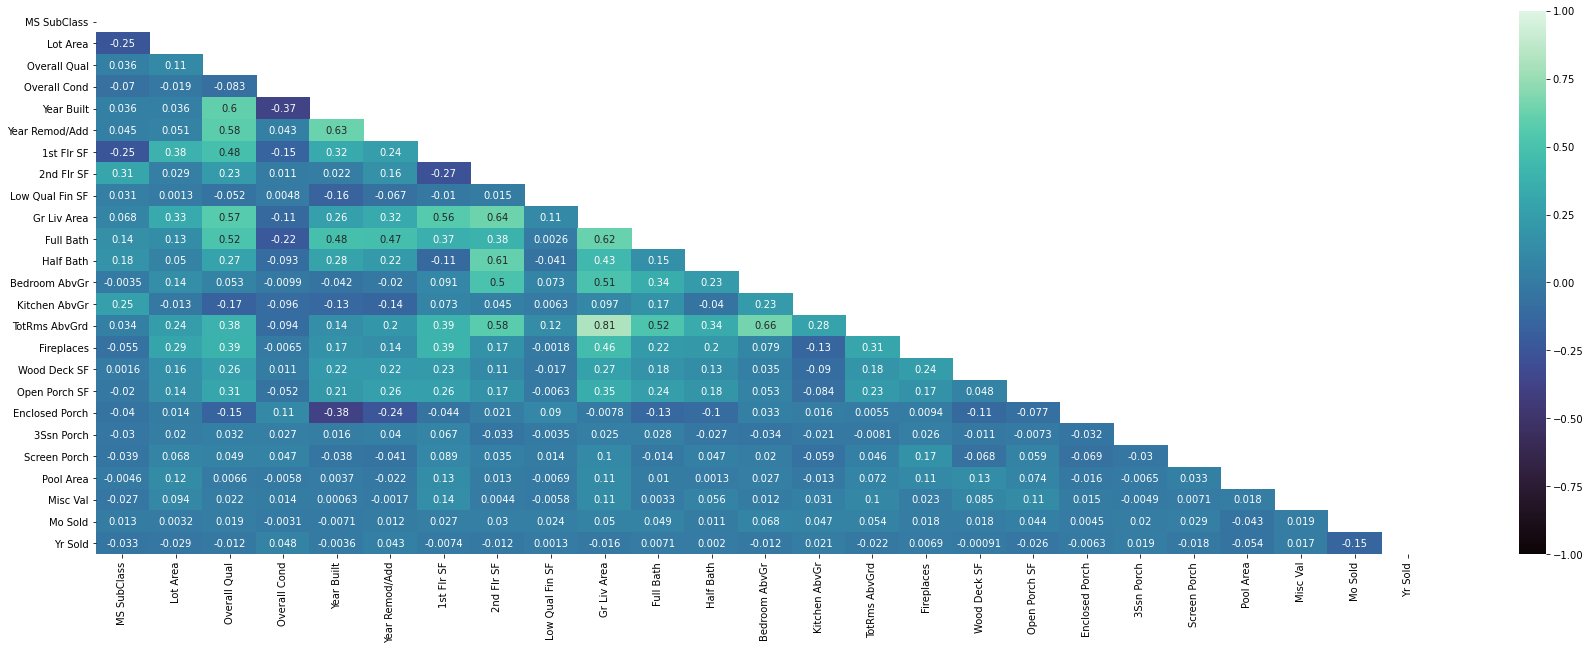

In [126]:
#train_df[null_features].corr()['SalePrice'].sort_values()
#print(corr)
corr = train_df[nulless_features].corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
plt.figure(figsize = (30, 10));
sns.heatmap(corr, mask = mask, cmap = 'mako', annot = True, vmin=-1, vmax=1);

In [127]:
# Scatter plots of each variable, histograms along diagonal
#sns.pairplot(train_df[nulless_features])

In [128]:
train_df.dropna(subset=['Garage Area','Total Bsmt SF'],inplace=True)

In [129]:
# Creating a submission dataframe out of the original test_df
clean_traindf = train_df.copy()

In [130]:
clean_traindf.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Lot ShapeC,Land ContourC,Lot ConfigC,Condition 1C,Bldg TypeC,Exterior 1stC,Exter QualC,FoundationC,Heating QCC,Central AirC
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,1,1,0,0,0,0,2,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,2,2,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# Write our sparkly clean dataframe to a csv for Pre-Processing and Feature Engineering
clean_traindf.to_csv(data+'datasets/clean_train.csv')